<a href="https://colab.research.google.com/github/sibiraaghav/Bharat-intern/blob/main/Stock_prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Bharat Intern
#Stock Price Prediction


#Loading the dataset
import pandas as pd
import pandas_datareader as pdr
data=pd.read_csv('/content/HDB.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-04,61.570000,61.820000,61.060001,61.639999,60.097965,1164100
1,2019-11-05,61.750000,61.950001,60.930000,60.990002,59.464233,2050500
2,2019-11-06,61.320000,62.189999,60.860001,62.110001,60.556210,1077900
3,2019-11-07,62.799999,63.009998,62.169998,62.270000,60.712212,936700
4,2019-11-08,62.130001,62.400002,61.740002,61.810001,60.263718,1119700


In [5]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1003,2023-10-30,56.930000,57.360001,56.919998,57.299999,57.299999,1554900
1004,2023-10-31,56.880001,56.930000,56.049999,56.549999,56.549999,1676000
1005,2023-11-01,56.750000,56.840000,56.290001,56.540001,56.540001,2262900
1006,2023-11-02,56.860001,57.959999,56.660000,57.830002,57.830002,1642100
1007,2023-11-03,58.000000,58.639999,57.900002,57.900002,57.900002,1664900


In [14]:
import datetime
def str_to_datetime(s):
  split=s.split('-')
  year,month,day=int(split[0]),int(split[1]),int(split[2])
  return datetime.datetime(year=year,month=month,day=day)
data['Date']=data['Date'].apply(str_to_datetime)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-04,61.570000,61.820000,61.060001,61.639999,60.097965,1164100
1,2019-11-05,61.750000,61.950001,60.930000,60.990002,59.464233,2050500
2,2019-11-06,61.320000,62.189999,60.860001,62.110001,60.556210,1077900
3,2019-11-07,62.799999,63.009998,62.169998,62.270000,60.712212,936700
4,2019-11-08,62.130001,62.400002,61.740002,61.810001,60.263718,1119700
...,...,...,...,...,...,...,...
1003,2023-10-30,56.930000,57.360001,56.919998,57.299999,57.299999,1554900
1004,2023-10-31,56.880001,56.930000,56.049999,56.549999,56.549999,1676000
1005,2023-11-01,56.750000,56.840000,56.290001,56.540001,56.540001,2262900
1006,2023-11-02,56.860001,57.959999,56.660000,57.830002,57.830002,1642100


In [16]:
data=data[['Date','Close']]
data

,Date,Close
0,2019-11-04,61.639999
1,2019-11-05,60.990002
2,2019-11-06,62.110001
3,2019-11-07,62.270000
4,2019-11-08,61.810001
...,...,...
1003,2023-10-30,57.299999
1004,2023-10-31,56.549999
1005,2023-11-01,56.540001
1006,2023-11-02,57.830002


In [17]:
data['Date']

0      2019-11-04
1      2019-11-05
2      2019-11-06
3      2019-11-07
4      2019-11-08
          ...    
1003   2023-10-30
1004   2023-10-31
1005   2023-11-01
1006   2023-11-02
1007   2023-11-03
Name: Date, Length: 1008, dtype: datetime64[ns]

In [19]:
data.index=data.pop('Date')
data

,Close
Date,
2019-11-04,61.639999
2019-11-05,60.990002
2019-11-06,62.110001
2019-11-07,62.270000
2019-11-08,61.810001
...,...
2023-10-30,57.299999
2023-10-31,56.549999
2023-11-01,56.540001


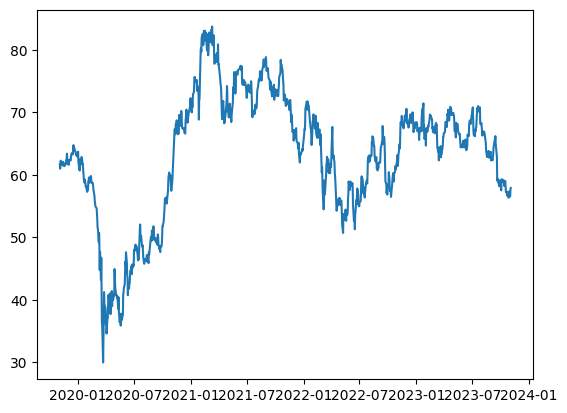

In [21]:
#Plotting the data
import matplotlib.pyplot as plt
plt.plot(data.index, data['Close'])

In [59]:
#Scaling the model
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(np.array(data).reshape(-1,1))
print(data)

[[0.58895704]
 [0.57687307]
 [0.59769476]
 ...
 [0.49414392]
 [0.51812609]
 [0.51942745]]


In [25]:
#Splitting into training and testing data
observations=len(data)
observations

1008

In [27]:
train=round(0.7*observations)
train

706

In [28]:
test=observations-train
test

302

In [ ]:
train_data,test_data=data[0:train,:],data[train:len(data),:1]
train_data

In [34]:
#Reshaping the model which is required for LSTM
import numpy
def create_dataset(dataset, timestep=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-timestep-1):
		a = dataset[i:(i+timestep), 0]
		dataX.append(a)
		dataY.append(dataset[i + timestep, 0])
	return numpy.array(dataX), numpy.array(dataY)
timestep = 100
Xtrain, Ytrain = create_dataset(train_data, timestep)
Xtest, Ytest = create_dataset(test_data, timestep)
print(Xtrain.shape)
print(Ytrain.shape)

(605, 100)
(605,)


In [35]:
print(Xtest.shape)
print(Ytest.shape)

(201, 100)
(201,)


In [36]:
Xtrain =Xtrain.reshape(Xtrain.shape[0],Xtrain.shape[1] , 1)
Xtest = Xtest.reshape(Xtest.shape[0],Xtest.shape[1] , 1)

#Building the LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model.fit(Xtrain,Ytrain,validation_data=(Xtest,Ytest),epochs=50,batch_size=35,verbose=1)

Epoch 1/50
18/18 [==============================] - 11s 283ms/step - loss: 0.1128 - val_loss: 0.0218
Epoch 2/50
18/18 [==============================] - 3s 153ms/step - loss: 0.0137 - val_loss: 0.0032
Epoch 3/50
18/18 [==============================] - 3s 148ms/step - loss: 0.0075 - val_loss: 0.0022
Epoch 4/50
18/18 [==============================] - 3s 148ms/step - loss: 0.0054 - val_loss: 0.0021
Epoch 5/50
18/18 [==============================] - 4s 228ms/step - loss: 0.0044 - val_loss: 0.0026
Epoch 6/50
18/18 [==============================] - 3s 149ms/step - loss: 0.0040 - val_loss: 0.0028
Epoch 7/50
18/18 [==============================] - 3s 148ms/step - loss: 0.0039 - val_loss: 0.0028
Epoch 8/50
18/18 [==============================] - 3s 148ms/step - loss: 0.0039 - val_loss: 0.0026
Epoch 9/50
18/18 [==============================] - 3s 193ms/step - loss: 0.0036 - val_loss: 0.0020
Epoch 10/50
18/18 [==============================] - 3s 171ms/step - loss: 0.0036 - val_loss: 0.001

In [40]:
#Prediction and performance metrics
import tensorflow as tf
predict_train=model.predict(Xtrain)
predict_test=model.predict(Xtest)

predict_train=scaler.inverse_transform(predict_train)
predict_test=scaler.inverse_transform(predict_test)

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Ytrain,predict_train))

7/7 [==============================] - 0s 35ms/step


0.05626431493075574

In [43]:
math.sqrt(mean_squared_error(Ytest,predict_test))

0.05768687829520775

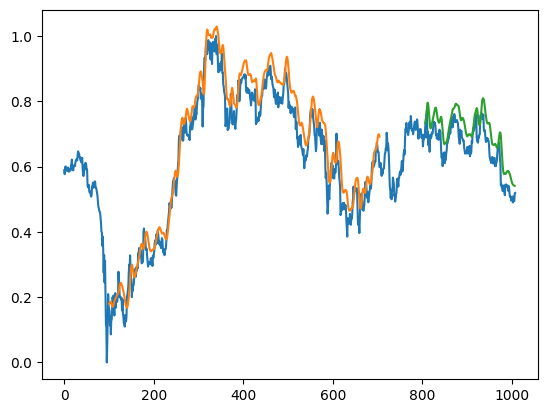

In [45]:
#Plotting the predictions
look_back=100
trainPredictPlot = numpy.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(predict_train)+look_back, :] = predict_train

testPredictPlot = numpy.empty_like(data)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(predict_train)+(look_back*2)+1:len(data)-1, :] = predict_test

plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [46]:
len(test_data)

302

In [47]:
x_input=test_data[202:].reshape(1,-1)
x_input.shape

(1, 100)

In [48]:
tempinput=list(x_input)
tempinput=tempinput[0].tolist()
tempinput

[0.6395241003992544,
 0.6439858404166976,
 0.6783788310396202,
 0.6737311270918176,
 0.7040342497855687,
 0.7142591055166556,
 0.7200223513660096,
 0.7097973469083967,
 0.7229968075293398,
 0.7246700553138121,
 0.73415127841325,
 0.7387989823610526,
 0.7590630459367348,
 0.6899051926026176,
 0.6780070704962435,
 0.6759620807592102,
 0.673359366548441,
 0.6925078882225713,
 0.688603835497233,
 0.698271003936215,
 0.6990146551586789,
 0.7546012873284761,
 0.7575757434918063,
 0.7544153419889322,
 0.7631530440016167,
 0.7527420942044601,
 0.7454916946367038,
 0.7536716907664681,
 0.7594348064801114,
 0.7122141157796225,
 0.7088677503463887,
 0.7124000611191661,
 0.6988288399548459,
 0.6826547744440461,
 0.6752184295367463,
 0.6854434339943589,
 0.6878601842747689,
 0.679680188145005,
 0.6854434339943589,
 0.6806097847070127,
 0.6759620807592102,
 0.6532812483123025,
 0.6302286925036495,
 0.6248373373333829,
 0.6187024053039152,
 0.6114519127820801,
 0.6265105107545916,
 0.613496921109929,

In [49]:
#Prediction for the future days
first=[]
n_steps=100
i=0
while(i<30):
    if(len(tempinput)>100):
        x_input=np.array(tempinput[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        tempinput.extend(yhat[0].tolist())
        tempinput=tempinput[1:]
        first.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        tempinput.extend(yhat[0].tolist())
        print(len(tempinput))
        first.extend(yhat.tolist())
        i=i+1
print(first)

[0.5452069]
101
1 day input [0.64398584 0.67837883 0.67373113 0.70403425 0.71425911 0.72002235
 0.70979735 0.72299681 0.72467006 0.73415128 0.73879898 0.75906305
 0.68990519 0.67800707 0.67596208 0.67335937 0.69250789 0.68860384
 0.698271   0.69901466 0.75460129 0.75757574 0.75441534 0.76315304
 0.75274209 0.74549169 0.75367169 0.75943481 0.71221412 0.70886775
 0.71240006 0.69882884 0.68265477 0.67521843 0.68544343 0.68786018
 0.67968019 0.68544343 0.68060978 0.67596208 0.65328125 0.63022869
 0.62483734 0.61870241 0.61145191 0.62651051 0.61349692 0.62967099
 0.61517009 0.60922105 0.62316416 0.62576686 0.62688233 0.60141293
 0.61052239 0.60159882 0.61331105 0.6172151  0.6395241  0.6555122
 0.66183302 0.66108937 0.67373113 0.65179396 0.62167694 0.6131251
 0.54285184 0.54712771 0.53746048 0.53299873 0.52519055 0.52946643
 0.54229413 0.54006318 0.51979919 0.5123629  0.54471088 0.54508272
 0.54526866 0.53746048 0.54024913 0.54210819 0.53615913 0.52500468
 0.54006318 0.52574833 0.51013204 0.

In [50]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
len(data)

1008

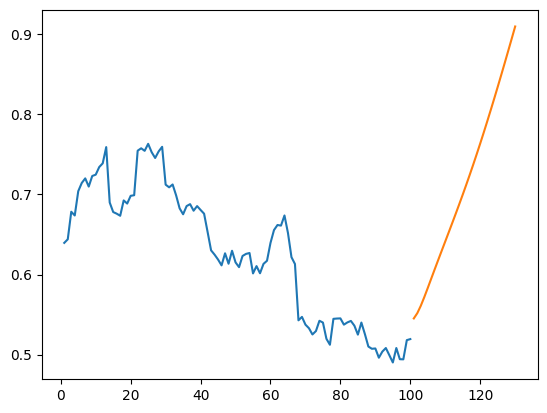

In [52]:
import matplotlib.pyplot as plt
plt.plot(day_new,scaler.inverse_transform(data[908:]))
plt.plot(day_pred,scaler.inverse_transform(first))

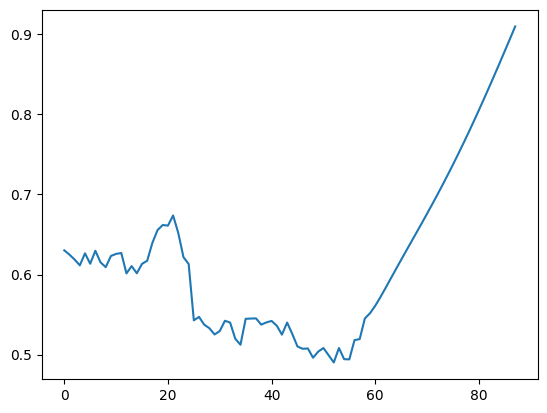

In [57]:
#Final Plotting
data2=data.tolist()
data2.extend(first)
plt.plot(data2[950:])

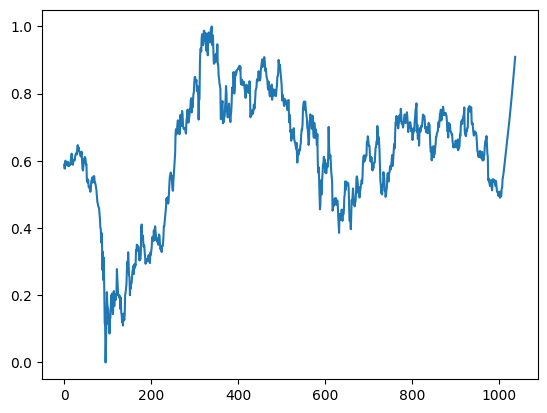

In [58]:
data2=scaler.inverse_transform(data2).tolist()
plt.plot(data2)